<a href="https://colab.research.google.com/github/amartyacodes/Federated-Learning-for-Covid-Chest-X-Ray-Classification/blob/main/FederatedLearningModel_Final_DenseNet121.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 pip install imutils

In [ ]:
import os
import numpy as np
import pandas as pd
from glob import glob 
from itertools import chain
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, average_precision_score
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf

import numpy as np
import random
import cv2
import os
import imutils
from imutils import paths
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
# from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import os
os.mkdir("/content/TrainValTestData")

In [ ]:
os.chdir('/content/TrainValTestData')

In [ ]:
!unzip "/content/drive/MyDrive/Research Paper/TrainTestValData.zip" 

Streaming output truncated to the last 5000 lines.
  inflating: Client1/Train/Healthy/Normal-4523.png  
  inflating: Client1/Train/Healthy/Normal-7445.png  
  inflating: Client1/Train/Healthy/Normal-3617.png  
  inflating: Client1/Train/Healthy/Normal-3131.png  
  inflating: Client1/Train/Healthy/Normal-5783.png  
  inflating: Client1/Train/Healthy/Normal-9137.png  
  inflating: Client1/Train/Healthy/Normal-4456.png  
  inflating: Client1/Train/Healthy/Normal-2246.png  
  inflating: Client1/Train/Healthy/Normal-4887.png  
  inflating: Client1/Train/Healthy/Normal-4124.png  
  inflating: Client1/Train/Healthy/Normal-508.png  
  inflating: Client1/Train/Healthy/Normal-4488.png  
  inflating: Client1/Train/Healthy/Normal-7932.png  
  inflating: Client1/Train/Healthy/Normal-4890.png  
  inflating: Client1/Train/Healthy/Normal-9601.png  
  inflating: Client1/Train/Healthy/Normal-3773.png  
  inflating: Client1/Train/Healthy/Normal-1561.png  
  inflating: Client1/Train/Healthy/Normal-5174.pn

In [ ]:
os.chdir('/content/')

In [ ]:
# import shutil
# shutil.rmtree('/content/TrainTestValData')

In [ ]:
# shutil.rmtree('/content/TrainValTestData/Client1')
# shutil.rmtree('/content/TrainValTestData/Client2')
# shutil.rmtree('/content/TrainValTestData/Client3')
# shutil.rmtree('/content/TrainValTestData/Client4')
# shutil.rmtree('/content/TrainValTestData/Client5')

# Making Necessary Directories

In [ ]:
os.mkdir("/content/TrainValTestData/Client1")
os.mkdir("/content/TrainValTestData/Client2")
os.mkdir("/content/TrainValTestData/Client3")
os.mkdir("/content/TrainValTestData/Client4")
os.mkdir("/content/TrainValTestData/Client5")

In [ ]:
os.mkdir("/content/TrainValTestData/Client1/Train")
os.mkdir("/content/TrainValTestData/Client1/Train/Covid")
os.mkdir("/content/TrainValTestData/Client1/Train/Healthy")
os.mkdir("/content/TrainValTestData/Client1/Val")
os.mkdir("/content/TrainValTestData/Client1/Val/Covid")
os.mkdir("/content/TrainValTestData/Client1/Val/Healthy")
os.mkdir("/content/TrainValTestData/Client1/Test")
os.mkdir("/content/TrainValTestData/Client1/Test/Covid")
os.mkdir("/content/TrainValTestData/Client1/Test/Healthy")

In [ ]:
os.mkdir("/content/TrainValTestData/Client2/Train")
os.mkdir("/content/TrainValTestData/Client2/Train/Covid")
os.mkdir("/content/TrainValTestData/Client2/Train/Healthy")
os.mkdir("/content/TrainValTestData/Client2/Val")
os.mkdir("/content/TrainValTestData/Client2/Val/Covid")
os.mkdir("/content/TrainValTestData/Client2/Val/Healthy")
os.mkdir("/content/TrainValTestData/Client2/Test")
os.mkdir("/content/TrainValTestData/Client2/Test/Covid")
os.mkdir("/content/TrainValTestData/Client2/Test/Healthy")

In [ ]:
os.mkdir("/content/TrainValTestData/Client3/Train")
os.mkdir("/content/TrainValTestData/Client3/Train/Covid")
os.mkdir("/content/TrainValTestData/Client3/Train/Healthy")
os.mkdir("/content/TrainValTestData/Client3/Val")
os.mkdir("/content/TrainValTestData/Client3/Val/Covid")
os.mkdir("/content/TrainValTestData/Client3/Val/Healthy")
os.mkdir("/content/TrainValTestData/Client3/Test")
os.mkdir("/content/TrainValTestData/Client3/Test/Covid")
os.mkdir("/content/TrainValTestData/Client3/Test/Healthy")

In [ ]:
os.mkdir("/content/TrainValTestData/Client4/Train")
os.mkdir("/content/TrainValTestData/Client4/Train/Covid")
os.mkdir("/content/TrainValTestData/Client4/Train/Healthy")
os.mkdir("/content/TrainValTestData/Client4/Val")
os.mkdir("/content/TrainValTestData/Client4/Val/Covid")
os.mkdir("/content/TrainValTestData/Client4/Val/Healthy")
os.mkdir("/content/TrainValTestData/Client4/Test")
os.mkdir("/content/TrainValTestData/Client4/Test/Covid")
os.mkdir("/content/TrainValTestData/Client4/Test/Healthy")

In [ ]:
os.mkdir("/content/TrainValTestData/Client5/Train")
os.mkdir("/content/TrainValTestData/Client5/Train/Covid")
os.mkdir("/content/TrainValTestData/Client5/Train/Healthy")
os.mkdir("/content/TrainValTestData/Client5/Val")
os.mkdir("/content/TrainValTestData/Client5/Val/Covid")
os.mkdir("/content/TrainValTestData/Client5/Val/Healthy")
os.mkdir("/content/TrainValTestData/Client5/Test")
os.mkdir("/content/TrainValTestData/Client5/Test/Covid")
os.mkdir("/content/TrainValTestData/Client5/Test/Healthy")

# Making Client1 Training Data

In [ ]:
#Splitting the Covid Data
import shutil
j =0 
for i in os.listdir('/content/Dataset/Client1/Covid/'):
  shutil.copy('/content/Dataset/Client1/Covid/' + str(i), '/content/TrainValTestData/Client1/Val/Covid')
  os.remove('/content/Dataset/Client1/Covid/' + str(i))
  j+=1
  if j>=13:
    break
j=0
for i in os.listdir('/content/Dataset/Client1/Covid/'):
  shutil.copy('/content/Dataset/Client1/Covid/' + str(i), '/content/TrainValTestData/Client1/Test/Covid')
  os.remove('/content/Dataset/Client1/Covid/' + str(i))
  j+=1
  if j>=13:
    break
j=0
for i in os.listdir('/content/Dataset/Client1/Covid/'):
  shutil.copy('/content/Dataset/Client1/Covid/' + str(i), '/content/TrainValTestData/Client1/Train/Covid')
  os.remove('/content/Dataset/Client1/Covid/' + str(i))
  j+=1
 
j=0
for i in os.listdir('/content/Dataset/Client1/Healthy/'):
  shutil.copy('/content/Dataset/Client1/Healthy/' + str(i), '/content/TrainValTestData/Client1/Val/Healthy')
  os.remove('/content/Dataset/Client1/Healthy/' + str(i))
  j+=1
  if j>=35:
    break
j=0
for i in os.listdir('/content/Dataset/Client1/Healthy/'):
  shutil.copy('/content/Dataset/Client1/Healthy/' + str(i), '/content/TrainValTestData/Client1/Test/Healthy')
  os.remove('/content/Dataset/Client1/Healthy/' + str(i))
  j+=1
  if j>=35:
    break
j= 0
for i in os.listdir('/content/Dataset/Client1/Healthy/'):
  shutil.copy('/content/Dataset/Client1/Healthy/' + str(i), '/content/TrainValTestData/Client1/Train/Healthy')
  os.remove('/content/Dataset/Client1/Healthy/' + str(i))
  j+=1
  if j>=4000:
    break

# Making Client 2 Training Data

In [ ]:
#Splitting the Covid Data
import shutil
j =0 
for i in os.listdir('/content/Dataset/Client2/Covid/'):
  shutil.copy('/content/Dataset/Client2/Covid/' + str(i), '/content/TrainValTestData/Client2/Val/Covid')
  os.remove('/content/Dataset/Client2/Covid/' + str(i))
  j+=1
  if j>=23:
    break
j=0
for i in os.listdir('/content/Dataset/Client2/Covid/'):
  shutil.copy('/content/Dataset/Client2/Covid/' + str(i), '/content/TrainValTestData/Client2/Test/Covid')
  os.remove('/content/Dataset/Client2/Covid/' + str(i))
  j+=1
  if j>=23:
    break
j=0
for i in os.listdir('/content/Dataset/Client2/Covid/'):
  shutil.copy('/content/Dataset/Client2/Covid/' + str(i), '/content/TrainValTestData/Client2/Train/Covid')
  os.remove('/content/Dataset/Client2/Covid/' + str(i))
  j+=1

 
j=0
for i in os.listdir('/content/Dataset/Client2/Healthy/'):
  shutil.copy('/content/Dataset/Client2/Healthy/' + str(i), '/content/TrainValTestData/Client2/Val/Healthy')
  os.remove('/content/Dataset/Client2/Healthy/' + str(i))
  j+=1
  if j>=25:
    break
j=0
for i in os.listdir('/content/Dataset/Client2/Healthy/'):
  shutil.copy('/content/Dataset/Client2/Healthy/' + str(i), '/content/TrainValTestData/Client2/Test/Healthy')
  os.remove('/content/Dataset/Client2/Healthy/' + str(i))
  j+=1
  if j>=25:
    break
j= 0
for i in os.listdir('/content/Dataset/Client2/Healthy/'):
  shutil.copy('/content/Dataset/Client2/Healthy/' + str(i), '/content/TrainValTestData/Client2/Train/Healthy')
  os.remove('/content/Dataset/Client2/Healthy/' + str(i))
  j+=1
  if j>=4000:
    break

# Making Client 3 Data

In [ ]:
#Splitting the Covid Data
import shutil
j =0 
for i in os.listdir('/content/Dataset/Client3/Covid/'):
  shutil.copy('/content/Dataset/Client3/Covid/' + str(i), '/content/TrainValTestData/Client3/Val/Covid')
  os.remove('/content/Dataset/Client3/Covid/' + str(i))
  j+=1
  if j>=27:
    break
j=0
for i in os.listdir('/content/Dataset/Client3/Covid/'):
  shutil.copy('/content/Dataset/Client3/Covid/' + str(i), '/content/TrainValTestData/Client3/Test/Covid')
  os.remove('/content/Dataset/Client3/Covid/' + str(i))
  j+=1
  if j>=27:
    break
j=0
for i in os.listdir('/content/Dataset/Client3/Covid/'):
  shutil.copy('/content/Dataset/Client3/Covid/' + str(i), '/content/TrainValTestData/Client3/Train/Covid')
  os.remove('/content/Dataset/Client3/Covid/' + str(i))
  j+=1
 
j=0
for i in os.listdir('/content/Dataset/Client3/Healthy/'):
  shutil.copy('/content/Dataset/Client3/Healthy/' + str(i), '/content/TrainValTestData/Client3/Val/Healthy')
  os.remove('/content/Dataset/Client3/Healthy/' + str(i))
  j+=1
  if j>=21:
    break
j=0
for i in os.listdir('/content/Dataset/Client3/Healthy/'):
  shutil.copy('/content/Dataset/Client3/Healthy/' + str(i), '/content/TrainValTestData/Client3/Test/Healthy')
  os.remove('/content/Dataset/Client3/Healthy/' + str(i))
  j+=1
  if j>=21:
    break
j= 0
for i in os.listdir('/content/Dataset/Client3/Healthy/'):
  shutil.copy('/content/Dataset/Client3/Healthy/' + str(i), '/content/TrainValTestData/Client3/Train/Healthy')
  os.remove('/content/Dataset/Client3/Healthy/' + str(i))
  j+=1
  if j>=4000:
    break

# Making Client4 Data

In [ ]:
#Splitting the Covid Data
import shutil
j =0 
for i in os.listdir('/content/Dataset/Client4/Covid/'):
  shutil.copy('/content/Dataset/Client4/Covid/' + str(i), '/content/TrainValTestData/Client4/Val/Covid')
  os.remove('/content/Dataset/Client4/Covid/' + str(i))
  j+=1
  if j>=11:
    break
j=0
for i in os.listdir('/content/Dataset/Client4/Covid/'):
  shutil.copy('/content/Dataset/Client4/Covid/' + str(i), '/content/TrainValTestData/Client4/Test/Covid')
  os.remove('/content/Dataset/Client4/Covid/' + str(i))
  j+=1
  if j>=11:
    break
j=0
for i in os.listdir('/content/Dataset/Client4/Covid/'):
  shutil.copy('/content/Dataset/Client4/Covid/' + str(i), '/content/TrainValTestData/Client4/Train/Covid')
  os.remove('/content/Dataset/Client4/Covid/' + str(i))
  j+=1
 
j=0
for i in os.listdir('/content/Dataset/Client4/Healthy/'):
  shutil.copy('/content/Dataset/Client4/Healthy/' + str(i), '/content/TrainValTestData/Client4/Val/Healthy')
  os.remove('/content/Dataset/Client4/Healthy/' + str(i))
  j+=1
  if j>=17:
    break
j=0
for i in os.listdir('/content/Dataset/Client4/Healthy/'):
  shutil.copy('/content/Dataset/Client4/Healthy/' + str(i), '/content/TrainValTestData/Client4/Test/Healthy')
  os.remove('/content/Dataset/Client4/Healthy/' + str(i))
  j+=1
  if j>=17:
    break
j= 0
for i in os.listdir('/content/Dataset/Client4/Healthy/'):
  shutil.copy('/content/Dataset/Client4/Healthy/' + str(i), '/content/TrainValTestData/Client4/Train/Healthy')
  os.remove('/content/Dataset/Client4/Healthy/' + str(i))
  j+=1
  if j>=4000:
    break

# Making Client 5 Data

In [ ]:
#Splitting the Covid Data
import shutil
j =0 
for i in os.listdir('/content/Dataset/Client5/Covid/'):
  shutil.copy('/content/Dataset/Client5/Covid/' + str(i), '/content/TrainValTestData/Client5/Val/Covid')
  os.remove('/content/Dataset/Client5/Covid/' + str(i))
  j+=1
  if j>=9:
    break
j=0
for i in os.listdir('/content/Dataset/Client5/Covid/'):
  shutil.copy('/content/Dataset/Client5/Covid/' + str(i), '/content/TrainValTestData/Client5/Test/Covid')
  os.remove('/content/Dataset/Client5/Covid/' + str(i))
  j+=1
  if j>=9:
    break
j=0
for i in os.listdir('/content/Dataset/Client5/Covid/'):
  shutil.copy('/content/Dataset/Client5/Covid/' + str(i), '/content/TrainValTestData/Client5/Train/Covid')
  os.remove('/content/Dataset/Client5/Covid/' + str(i))
  j+=1
 
j=0
for i in os.listdir('/content/Dataset/Client5/Healthy/'):
  shutil.copy('/content/Dataset/Client5/Healthy/' + str(i), '/content/TrainValTestData/Client5/Val/Healthy')
  os.remove('/content/Dataset/Client5/Healthy/' + str(i))
  j+=1
  if j>=33:
    break
j=0
for i in os.listdir('/content/Dataset/Client5/Healthy/'):
  shutil.copy('/content/Dataset/Client5/Healthy/' + str(i), '/content/TrainValTestData/Client5/Test/Healthy')
  os.remove('/content/Dataset/Client5/Healthy/' + str(i))
  j+=1
  if j>=33:
    break
j= 0
for i in os.listdir('/content/Dataset/Client5/Healthy/'):
  shutil.copy('/content/Dataset/Client5/Healthy/' + str(i), '/content/TrainValTestData/Client5/Train/Healthy')
  os.remove('/content/Dataset/Client5/Healthy/' + str(i))
  j+=1
  if j>=4000:
    break

In [ ]:
import shutil
shutil.make_archive('/content/TrainTestValData', 'zip', '/content/TrainValTestData')

'/content/TrainTestValData.zip'

In [ ]:
import os
k = 0
for i in os.listdir('/content/TrainValTestData/Client1/Train/Healthy'):
  os.remove('/content/TrainValTestData/Client1/Train/Healthy/' + str(i))
  k+=1
  if k>=1000:
    break


In [ ]:
# import os
# k = 0
# for i in os.listdir('/content/TrainValTestData/Client2/Train/Healthy'):
#   os.remove('/content/TrainValTestData/Client2/Train/Healthy/' + str(i))
#   k+=1
#   if k>=500:
#     break

k = 0
for i in os.listdir('/content/TrainValTestData/Client2/Train/Covid'):
  os.remove('/content/TrainValTestData/Client2/Train/Covid/' + str(i))
  k+=1
  if k>=500:
    break


In [ ]:
len(os.listdir('/content/TrainValTestData/Client1/Train/Covid'))

2590

In [ ]:
import os
k = 0
for i in os.listdir('/content/TrainValTestData/Client2/Train/Healthy'):
  os.remove('/content/TrainValTestData/Client2/Train/Healthy/' + str(i))
  k+=1
  if k>=1000:
    break

In [ ]:
src = '/content/TrainTestValData.zip'
dst = '/content/drive/MyDrive/Research Paper'
shutil.copy(src, dst)

'/content/drive/MyDrive/Research Paper/TrainTestValData.zip'

# Model

In [ ]:

# def load(paths, verbose=-1):
#     '''expects images for each class in seperate dir, 
#     e.g all digits in 0 class in the directory named 0 '''
#     data = list()
#     labels = list()
#     # loop over the input images
#     for (i, imgpath) in enumerate(paths):
#         # load the image and extract the class labels
#         im_gray = cv2.imread(imgpath)
#         im_gray = cv2.resize(im_gray,(224,224))
# #         image = np.array(im_gray).flatten()
#         label = imgpath.split(os.path.sep)[-2]
#         # scale the image to [0, 1] and add to list
#         data.append(im_gray/255.0)
#         labels.append(label)
#         # show an update every `verbose` images
#         if verbose > 0 and i > 0 and (i + 1) % verbose == 0:
#             print("[INFO] processed {}/{}".format(i + 1, len(paths)))
#     # return a tuple of the data and labels
#     return data, labels

In [ ]:

# def create_clients(image_list, label_list, client_id):
#     ''' return: a dictionary with keys clients' names and value as 
#                 data shards - tuple of images and label lists.
#         args: 
#             image_list: a list of numpy arrays of training images
#             label_list:a list of binarized labels for each image
#             num_client: number of fedrated members (clients)
#             initials: the clients'name prefix, e.g, clients_1 
            
#     '''

#     #create a list of client names
#     # client_names = ['{}_{}'.format(initial, i+1) for i in range(num_clients)]
#     client_names = [str(client_id)]

#     #randomize the data
#     data = list(zip(image_list, label_list))
#     random.shuffle(data)

#     #shard data and place at each client
   
#     shards = [data]

#     #number of clients must equal number of shards
#     assert(len(shards) == len(client_names))

#     return {client_names[i] : shards[i] for i in range(len(client_names))}

## Preprocessing Client 1 Data

In [ ]:
img_path = "/content/TrainValTestData/Client1/Train"

#get the path list using the path object
image_paths = list(paths.list_images(img_path))

#apply our function
image_list, label_list = load(image_paths, verbose=1000)

#binarize the labels
lb = LabelBinarizer()
label_list = lb.fit_transform(label_list)

[INFO] processed 1000/5588
[INFO] processed 2000/5588
[INFO] processed 3000/5588
[INFO] processed 4000/5588
[INFO] processed 5000/5588


In [ ]:
X_train = image_list
y_train = label_list

In [ ]:
img_path = "/content/TrainValTestData/Client1/Val"

#get the path list using the path object
image_paths = list(paths.list_images(img_path))

#apply our function
image_list, label_list = load(image_paths, verbose=1000)

#binarize the labels
lb = LabelBinarizer()
label_list = lb.fit_transform(label_list)

In [ ]:
X_val = image_list
y_val = label_list

In [ ]:
img_path = "/content/TrainValTestData/Client1/Test"

#get the path list using the path object
image_paths = list(paths.list_images(img_path))

#apply our function
image_list, label_list = load(image_paths, verbose=1000)

#binarize the labels
lb = LabelBinarizer()
label_list = lb.fit_transform(label_list)

In [ ]:
X_test = image_list
y_test = label_list

In [ ]:
clients1_train = create_clients(X_train, y_train, 'Client1')
clients1_val = create_clients(X_val, y_val, 'Client1')
clients1_test = create_clients(X_test, y_test, 'Client1')

In [ ]:
del X_train

In [ ]:
from tensorflow.keras import backend as K
K.clear_session()

## Preprocessing Client2 Data

In [ ]:
img_path = "/content/TrainValTestData/Client2/Train"

#get the path list using the path object
image_paths = list(paths.list_images(img_path))

#apply our function
image_list, label_list = load(image_paths, verbose=1000)

#binarize the labels
lb = LabelBinarizer()
label_list = lb.fit_transform(label_list)

[INFO] processed 1000/2330
[INFO] processed 2000/2330


In [ ]:
X_train = image_list
y_train = label_list

In [ ]:
img_path = "/content/TrainValTestData/Client2/Val"

#get the path list using the path object
image_paths = list(paths.list_images(img_path))

#apply our function
image_list, label_list = load(image_paths, verbose=1000)

#binarize the labels
lb = LabelBinarizer()
label_list = lb.fit_transform(label_list)

In [ ]:
X_val = image_list
y_val = label_list

In [ ]:
img_path = "/content/TrainValTestData/Client2/Test"

#get the path list using the path object
image_paths = list(paths.list_images(img_path))

#apply our function
image_list, label_list = load(image_paths, verbose=1000)

#binarize the labels
lb = LabelBinarizer()
label_list = lb.fit_transform(label_list)

In [ ]:
X_test = image_list
y_test = label_list

In [ ]:
clients2_train = create_clients(X_train, y_train, 'Client2')
clients2_val = create_clients(X_val, y_val, 'Client2')
clients2_test = create_clients(X_test, y_test, 'Client2')

In [ ]:
from tensorflow.keras import backend as K
K.clear_session()

In [ ]:
X_train = []
y_train = []

## Preprocessing Client3 Data

In [ ]:
img_path = "/content/TrainValTestData/Client3/Train"

#get the path list using the path object
image_paths = list(paths.list_images(img_path))

#apply our function
image_list, label_list = load(image_paths, verbose=1000)

#binarize the labels
lb = LabelBinarizer()
label_list = lb.fit_transform(label_list)
X_train = image_list
y_train = label_list

In [ ]:
img_path = "/content/TrainValTestData/Client3/Val"

#get the path list using the path object
image_paths = list(paths.list_images(img_path))

#apply our function
image_list, label_list = load(image_paths, verbose=1000)

#binarize the labels
lb = LabelBinarizer()
label_list = lb.fit_transform(label_list)
X_val = image_list
y_val = label_list

In [ ]:
img_path = "/content/TrainValTestData/Client3/Test"

#get the path list using the path object
image_paths = list(paths.list_images(img_path))

#apply our function
image_list, label_list = load(image_paths, verbose=1000)

#binarize the labels
lb = LabelBinarizer()
label_list = lb.fit_transform(label_list)
X_test = image_list
y_test = label_list

In [ ]:
clients3_train = create_clients(X_train, y_train, 'Client3')
clients3_val = create_clients(X_val, y_val, 'Client3')
clients3_test = create_clients(X_test, y_test, 'Client3')

## Preprocessing Client4 Data

In [ ]:
img_path = "/content/TrainValTestData/Client4/Train"

#get the path list using the path object
image_paths = list(paths.list_images(img_path))

#apply our function
image_list, label_list = load(image_paths, verbose=1000)

#binarize the labels
lb = LabelBinarizer()
label_list = lb.fit_transform(label_list)
X_train = image_list
y_train = label_list

In [ ]:
img_path = "/content/TrainValTestData/Client4/Val"

#get the path list using the path object
image_paths = list(paths.list_images(img_path))

#apply our function
image_list, label_list = load(image_paths, verbose=1000)

#binarize the labels
lb = LabelBinarizer()
label_list = lb.fit_transform(label_list)
X_val = image_list
y_val = label_list

In [ ]:
img_path = "/content/TrainValTestData/Client4/Test"

#get the path list using the path object
image_paths = list(paths.list_images(img_path))

#apply our function
image_list, label_list = load(image_paths, verbose=1000)

#binarize the labels
lb = LabelBinarizer()
label_list = lb.fit_transform(label_list)
X_test = image_list
y_test = label_list

In [ ]:
clients4_train = create_clients(X_train, y_train, 'Client4')
clients4_val = create_clients(X_val, y_val, 'Client4')
clients4_test = create_clients(X_test, y_test, 'Client4')

## Preprocessing Client5 Data

In [ ]:
img_path = "/content/TrainValTestData/Client5/Train"

#get the path list using the path object
image_paths = list(paths.list_images(img_path))

#apply our function
image_list, label_list = load(image_paths, verbose=1000)

#binarize the labels
lb = LabelBinarizer()
label_list = lb.fit_transform(label_list)
X_train = image_list
y_train = label_list

In [ ]:
img_path = "/content/TrainValTestData/Client5/Val"

#get the path list using the path object
image_paths = list(paths.list_images(img_path))

#apply our function
image_list, label_list = load(image_paths, verbose=1000)

#binarize the labels
lb = LabelBinarizer()
label_list = lb.fit_transform(label_list)
X_val = image_list
y_val = label_list

In [ ]:
img_path = "/content/TrainValTestData/Client5/Val"

#get the path list using the path object
image_paths = list(paths.list_images(img_path))

#apply our function
image_list, label_list = load(image_paths, verbose=1000)

#binarize the labels
lb = LabelBinarizer()
label_list = lb.fit_transform(label_list)
X_val = image_list
y_val = label_list

In [ ]:
clients5_train = create_clients(X_train, y_train, 'Client5')
clients5_val = create_clients(X_val, y_val, 'Client5')
clients5_test = create_clients(X_test, y_test, 'Client5')

In [ ]:
clients_train = {**clients1_train, **clients2_train,**clients3_train,**clients4_train,**clients5_train}
clients_val = {**clients1_val, **clients2_val,**clients3_val,**clients4_val,**clients5_val}
clients_test = {**clients1_test, **clients2_test,**clients3_test,**clients4_test,**clients5_test}

In [ ]:
clients_train

{'Client1': [(array([[[0.07058824, 0.07058824, 0.07058824],
           [0.07058824, 0.07058824, 0.07058824],
           [0.06666667, 0.06666667, 0.06666667],
           ...,
           [0.35686275, 0.35686275, 0.35686275],
           [0.34509804, 0.34509804, 0.34509804],
           [0.33333333, 0.33333333, 0.33333333]],
   
          [[0.08235294, 0.08235294, 0.08235294],
           [0.0745098 , 0.0745098 , 0.0745098 ],
           [0.07058824, 0.07058824, 0.07058824],
           ...,
           [0.40392157, 0.40392157, 0.40392157],
           [0.4       , 0.4       , 0.4       ],
           [0.38431373, 0.38431373, 0.38431373]],
   
          [[0.07843137, 0.07843137, 0.07843137],
           [0.07058824, 0.07058824, 0.07058824],
           [0.07058824, 0.07058824, 0.07058824],
           ...,
           [0.41568627, 0.41568627, 0.41568627],
           [0.40392157, 0.40392157, 0.40392157],
           [0.39215686, 0.39215686, 0.39215686]],
   
          ...,
   
          [[0.10588235, 0

In [ ]:
from sklearn.externals import joblib
# joblib.dump(clients_train,  'clients_train.pkl')   

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# from sklearn.externals import joblib
# joblib.dump(clients_val,  'clients_var.pkl')  
# joblib.dump(clients_test,  'clients_test.pkl')    

['clients_test.pkl']

In [ ]:
import shutil
src1 ='/content/clients_test.pkl'
src2 = '/content/clients_train.pkl'
src3 = '/content/clients_val.pkl'
dst ='/content/drive/MyDrive/Research Paper'
shutil.copy(src1,dst)
shutil.copy(src2,dst)
shutil.copy(src3,dst)


'/content/drive/MyDrive/Research Paper/clients_val.pkl'

In [ ]:
clients_train = joblib.load('clients_train.pkl')
clients_val = joblib.load('clients_val.pkl')
clients_test = joblib.load('clients_test.pkl')



In [ ]:
def batch_data(data_shard, bs=32):
    '''Takes in a clients data shard and create a tfds object off it
    args:
        shard: a data, label constituting a client's data shard
        bs:batch size
    
    return:
        tfds object'''
    #seperate shard into data and labels lists
    data, label = zip(*data_shard)
    dataset = tf.data.Dataset.from_tensor_slices((list(data), list(label)))
    return dataset.shuffle(len(label)).batch(bs)

In [ ]:
import gc
gc.collect()

131

In [ ]:
clients_batched_train = dict()                                      
for (client_name, data) in clients_train.items():
    clients_batched_train[client_name] = batch_data(data)
clients_batched_val = dict()                                      
for (client_name, data) in clients_val.items():
    clients_batched_val[client_name] = batch_data(data)
clients_batched_test = dict()                                      
for (client_name, data) in clients_test.items():
    clients_batched_test[client_name] = batch_data(data)

NameError: ignored

## Defining Metrics

In [ ]:
import numpy as np
import tensorflow as tf
from keras import backend as K


def recall(y_true, y_pred):
    predicted = y_pred
    actual = y_true
    TP = tf.math.count_nonzero(predicted * actual)
    TN = tf.math.count_nonzero((predicted - 1) * (actual - 1))
    FP = tf.math.count_nonzero(predicted * (actual - 1))
    FN = tf.math.count_nonzero((predicted - 1) * actual)
    recall_keras = tf.divide(TP, TP + FN)
    return recall_keras



def precision(y_true, y_pred):
    predicted = y_pred
    actual = y_true
    TP = tf.math.count_nonzero(predicted * actual)
    TN = tf.math.count_nonzero((predicted - 1) * (actual - 1))
    FP = tf.math.count_nonzero(predicted * (actual - 1))
    FN = tf.math.count_nonzero((predicted - 1) * actual)
    precision_keras = tf.divide(TP, TP + FP)
    return precision_keras




def f1(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * ((p * r) / (p + r + K.epsilon()))
    

## Defining Model Parameters

In [ ]:
comms_round =4
loss= 'binary_crossentropy'
metrics=["accuracy",
        "AUC",
        "Precision",
        "Recall"]
# metrics = ['accuracy']
optimizer = Adam()  

### DenseNet 121 Function

In [ ]:
import tensorflow as tf
IMAGE_SIZE = [224,224]
class SimpleMLP:
    @staticmethod
    def build(classes):
        densenet = tf.keras.applications.DenseNet201(input_shape=IMAGE_SIZE +[3],weights='imagenet',include_top=False)
        for layers in densenet.layers:
            layers.trainable = False
        model = Flatten()(densenet.output)
        model = Dense(classes,activation='sigmoid')(model)
        model = tf.keras.Model(inputs = densenet.input, outputs = model)
        return model

## Train Test and Valid Generators

In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# rotation_range = 20,

In [ ]:
train_datagen = ImageDataGenerator( rotation_range = 20,rescale=1./255,horizontal_flip=False)
valid_datagen = ImageDataGenerator(rotation_range = 20,rescale=1./255,horizontal_flip=False)
test_datagen = ImageDataGenerator(rotation_range = 20,rescale=1./255,horizontal_flip=False)

### Making Training Generator

In [ ]:
train_generator_client1 = train_datagen.flow_from_directory(
    directory=r"/content/TrainValTestData/Client1/Train/",
    target_size=(224, 224),
    # color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    # shuffle=True,
    seed=42
)
train_generator_client2 = train_datagen.flow_from_directory(
    directory=r"/content/TrainValTestData/Client2/Train/",
    target_size=(224, 224),
    # color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    # shuffle=True,
    seed=42
)
train_generator_client3 = train_datagen.flow_from_directory(
    directory=r"/content/TrainValTestData/Client3/Train/",
    target_size=(224, 224),
    # color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    # shuffle=True,
    seed=42
)
train_generator_client4 = train_datagen.flow_from_directory(
    directory=r"/content/TrainValTestData/Client4/Train/",
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    # shuffle=True,
    seed=42
)
train_generator_client5 = train_datagen.flow_from_directory(
    directory=r"/content/TrainValTestData/Client5/Train/",
    target_size=(224, 224),
    # color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    # shuffle=True,
    seed=42
)

Found 5588 images belonging to 2 classes.
Found 2330 images belonging to 2 classes.
Found 382 images belonging to 2 classes.
Found 186 images belonging to 2 classes.
Found 339 images belonging to 2 classes.


### Validation Generators

In [ ]:
valid_generator_client1 = valid_datagen.flow_from_directory(
    directory=r"/content/TrainValTestData/Client1/Val/",
    target_size=(224, 224),
    # color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    # shuffle=True,
    seed=42
)
valid_generator_client2 = valid_datagen.flow_from_directory(
    directory=r"/content/TrainValTestData/Client2/Val/",
    target_size=(224, 224),
    # color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    # shuffle=True,
    seed=42
)
valid_generator_client3 = valid_datagen.flow_from_directory(
    directory=r"/content/TrainValTestData/Client3/Val/",
    target_size=(224, 224),
    # color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    # shuffle=True,
    seed=42
)
valid_generator_client4 = valid_datagen.flow_from_directory(
    directory=r"/content/TrainValTestData/Client4/Val/",
    target_size=(224, 224),
    # color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    # shuffle=True,
    seed=42
)
valid_generator_client5 = valid_datagen.flow_from_directory(
    directory=r"/content/TrainValTestData/Client5/Val/",
    target_size=(224, 224),
    # color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    # shuffle=True,
    seed=42
)

Found 48 images belonging to 2 classes.
Found 48 images belonging to 2 classes.
Found 48 images belonging to 2 classes.
Found 28 images belonging to 2 classes.
Found 42 images belonging to 2 classes.


### Making the Test Generator

In [ ]:
test_generator_client1 = test_datagen.flow_from_directory(
    directory=r"/content/TrainValTestData/Client1/Test/",
    target_size=(224, 224),
    # color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    # shuffle=True,
    seed=42
)
test_generator_client2 = test_datagen.flow_from_directory(
    directory=r"/content/TrainValTestData/Client2/Test/",
    target_size=(224, 224),
    # color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    # shuffle=True,
    seed=42
)
test_generator_client3 = test_datagen.flow_from_directory(
    directory=r"/content/TrainValTestData/Client3/Test/",
    target_size=(224, 224),
    # color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    # shuffle=True,
    seed=42
)
test_generator_client4 = test_datagen.flow_from_directory(
    directory=r"/content/TrainValTestData/Client4/Test/",
    target_size=(224, 224),
    # color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    # shuffle=True,
    seed=42
)
test_generator_client5 = test_datagen.flow_from_directory(
    directory=r"/content/TrainValTestData/Client5/Test/",
    target_size=(224, 224),
    # color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    # shuffle=True,
    seed=42
)

Found 48 images belonging to 2 classes.
Found 48 images belonging to 2 classes.
Found 48 images belonging to 2 classes.
Found 28 images belonging to 2 classes.
Found 42 images belonging to 2 classes.


## Function for Federated Averaging Algorithm

In [ ]:
def weight_scalling_factor(clients_trn_data, client_name):
    client_names = list(clients_trn_data.keys())
    #get the bs
    bs = list(clients_trn_data[client_name])[0][0].shape[0]
    #first calculate the total training data points across clinets
    global_count = sum([tf.data.experimental.cardinality(clients_trn_data[client_name]).numpy() for client_name in client_names])*bs
    # get the total number of data points held by a client
    local_count = tf.data.experimental.cardinality(clients_trn_data[client_name]).numpy()*bs
    return local_count/global_count

def scale_model_weights(weight, scalar):
    '''function for scaling a models weights'''
    weight_final = []
    steps = len(weight)
    for i in range(steps):
        weight_final.append(scalar * weight[i])
    return weight_final



def sum_scaled_weights(scaled_weight_list):
    '''Return the sum of the listed scaled weights. The is equivalent to scaled avg of the weights'''
    avg_grad = list()
    #get the average grad accross all client gradients
    for grad_list_tuple in zip(*scaled_weight_list):
        layer_mean = tf.math.reduce_sum(grad_list_tuple, axis=0)
        avg_grad.append(layer_mean)
        
    return avg_grad

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten,BatchNormalization,Dropout,Activation
from keras.models import Model
from keras.applications.densenet import DenseNet121
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import tensorflow as tf 
import random as rn
import numpy as np
import os

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import MaxPooling2D,GlobalAveragePooling2D,BatchNormalization,Activation
from tensorflow import keras
from keras import backend as K

%matplotlib inline

## Global Model Training

In [ ]:
# os.mkdir('/content/model_checkpoints')

**Creating the array containing the generators**

In [ ]:
clients_train = [train_generator_client1, train_generator_client2,train_generator_client3,train_generator_client4,train_generator_client5]
clients_val  = [valid_generator_client1,valid_generator_client2,valid_generator_client3,valid_generator_client4,valid_generator_client5]
clients_test  = [test_generator_client1,test_generator_client2,test_generator_client3,test_generator_client4,test_generator_client5]

### Model Training

In [ ]:
smlp_global = SimpleMLP()
global_model = smlp_global.build(2)
global_model.compile(loss= loss , 
                  optimizer= optimizer, 
                  metrics=metrics)
i=0
k=0
flag=0
# client1_metrics= {'loss': [], 'acc' = [], 'f1' = []}
# client2_metrics= {'loss': [], 'acc' = [], 'f1' = []}
# client3_metrics= {'loss': [], 'acc' = [], 'f1' = []}
# client4_metrics= {'loss': [], 'acc' = [], 'f1' = []}
# client5_metrics= {'loss': [], 'acc' = [], 'f1' = []}
# metrics_clients = [client1_metrics,client2_metrics,client3_metrics,client4_metrics,client5_metrics]

# #commence global training loop
# #tracking accuracies of the clients
# client1_acc= []
# client2_acc=[]
# client3_acc=[]
# client4_acc=[]
# client5_acc=[]
#   #tracking f1 scores of the clients
# client1_f1= []
# client2_f1=[]
# client3_f1=[]
# client4_f1=[]
# client5_f1=[]
#   #tracking loss of the clients 
# client1_loss= []
# client2_loss=[]
# client3_loss=[]
# client4_loss=[]
# client5_loss=[]
val_loss = [99999999,99999999,99999999,99999999,99999999]
best_client_weights= [0,0,0,0,0]
for comm_round in range(comms_round):
            
    # get the global model's weights - will serve as the initial weights for all local models
    global_weights = global_model.get_weights()
    
    #initial list to collect local model weights after scalling
    scaled_local_weight_list = list()

    #randomize client data - using keys
    client_names= [0, 1, 2,3, 4]
    #random.shuffle(client_names)
    
    #loop through each client and create new local model
    j=0
    scaling_factor = 0
    
    checkpoint_filepath = '/content/model_checkpoints/'

    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)
    

    print("Global epoch number: "+ str(k+1))
    for client in client_names:
        smlp_local = SimpleMLP()
        local_model = smlp_local.build(2)
        local_model.compile(loss=loss, 
                      optimizer=optimizer, 
                      metrics=metrics)
        
        #set local model weight to the weight of the global model
        local_model.set_weights(global_weights)
        print("Client No : ",j+1)

        STEP_SIZE_TRAIN=clients_train[client].n//clients_train[client].batch_size
        STEP_SIZE_VALID=clients_val[client].n//clients_val[client].batch_size


        # client=client+3
        #fit local model with client's data
        local_model.fit(clients_train[client], 
                                  validation_data = clients_val[client],
                                  epochs=5)
        
        #scale the model weights and add to list
        # scaled_weights = scale_model_weights(local_model.get_weights(), scaling_factor)
        print("The validation accuracy results are : ")
        local_model.evaluate(clients_val[client])
        
        
        
        # if client ==0 :
        #   client1_loss.append(local_model.evaluate(clients_val[client])[0])
        #   client1_acc.append(local_model.evaluate(clients_val[client])[1])
        #   client1_f1.append(local_model.evaluate(clients_val[client])[4])
        # elif client ==1 :
        #   client2_loss.append(local_model.evaluate(clients_val[client])[0])
        #   client2_acc.append(local_model.evaluate(clients_val[client])[1])
        #   client2_f1.append(local_model.evaluate(clients_val[client])[4])
        # elif client ==2 :
        #   client3_loss.append(local_model.evaluate(clients_val[client])[0])
        #   client3_acc.append(local_model.evaluate(clients_val[client])[1])
        #   client3_f1.append(local_model.evaluate(clients_val[client])[4])
        # elif client ==3 :
        #   client4_loss.append(local_model.evaluate(clients_val[client])[0])
        #   client4_acc.append(local_model.evaluate(clients_val[client])[1])
        #   client4_f1.append(local_model.evaluate(clients_val[client])[4])
        # elif client ==4 :
        #   client5_loss.append(local_model.evaluate(clients_val[client])[0])
        #   client5_acc.append(local_model.evaluate(clients_val[client])[1])
        #   client5_f1.append(local_model.evaluate(clients_val[client])[4])
        # metrics_clients[client]['loss'].append(local_model.evaluate(clients_val[client])[0])
        # metrics_clients[client]['acc'].append(local_model.evaluate(clients_val[client])[1])
        # metrics_clients[client]['f1'].append(local_model.evaluate(clients_val[client])[4])







        val_loss_pres = local_model.evaluate(clients_val[client])[0]
        print("Present Val Loss = ", val_loss_pres)

        
       #if val_loss is lesser than the previous epoch, the weights are considered for averaging else not 
        val_loss_prev = val_loss[client]
        if k ==0 :
          print("First epoch so every weights would be added!")
           #giving equal values to each of the clients 
          # scaled_weights = scale_model_weights(local_model.get_weights(), scaling_factor)
          scaled_local_weight_list.append(local_model.get_weights())
          best_client_weights[client] = local_model.get_weights()
          val_loss[client] = val_loss_pres
        elif val_loss_pres < val_loss_prev :
           #giving equal values to each of the clients 
          # scaled_weights = scale_model_weights(local_model.get_weights(), scaling_factor)
          scaled_local_weight_list.append(local_model.get_weights())
          best_client_weights[client] = local_model.get_weights()
          val_loss[client] = val_loss_pres
        elif val_loss_pres >= val_loss_prev:
          scaled_local_weight_list.append(best_client_weights[client])

         

        
        j+=1
        #clear session to free memory after each communication round
        K.clear_session()
    
    print("The number of elements in scaled_local_weight_list= ", len(scaled_local_weight_list))
    #Federated Averaging Process
    if len(scaled_local_weight_list)>0:
      scaling_factor = 1 / len(scaled_local_weight_list)
      for i in range(0,len(scaled_local_weight_list)):
        scaled_local_weight_list[i] = scale_model_weights(scaled_local_weight_list[i], scaling_factor)
      average_weights = sum_scaled_weights(scaled_local_weight_list)
      global_model.set_weights(average_weights)
    k+= 1
    

 
   

Global epoch number: 1
Client No :  1
Epoch 1/5
175/175 [==============================] - 116s 570ms/step - loss: 0.6604 - accuracy: 0.8824 - auc: 0.9449 - precision: 0.8598 - recall: 0.9035 - val_loss: 0.2639 - val_accuracy: 0.9583 - val_auc: 0.9800 - val_precision: 0.9592 - val_recall: 0.9792
Epoch 2/5
175/175 [==============================] - 95s 543ms/step - loss: 0.6463 - accuracy: 0.9166 - auc: 0.9623 - precision: 0.9069 - recall: 0.9241 - val_loss: 0.3065 - val_accuracy: 0.9583 - val_auc: 0.9809 - val_precision: 0.9583 - val_recall: 0.9583
Epoch 3/5
175/175 [==============================] - 95s 542ms/step - loss: 0.3349 - accuracy: 0.9415 - auc: 0.9822 - precision: 0.9317 - recall: 0.9520 - val_loss: 0.4250 - val_accuracy: 0.9583 - val_auc: 0.9735 - val_precision: 0.9583 - val_recall: 0.9583
Epoch 4/5
175/175 [==============================] - 95s 542ms/step - loss: 0.3906 - accuracy: 0.9424 - auc: 0.9797 - precision: 0.9350 - recall: 0.9497 - val_loss: 1.3787 - val_accuracy:

## Validation  Scores of Clients - Loss , Accuracy, Precision, Recall and F1

### Client1

In [ ]:
global_model.evaluate(clients_val[0])

2/2 [==============================] - 1s 189ms/step - loss: 1.7658 - accuracy: 0.9583 - auc: 0.9566 - precision: 0.9583 - recall: 0.9583


[1.7658191919326782,
 0.9583333134651184,
 0.9565972089767456,
 0.9583333134651184,
 0.9583333134651184]

### Client2

In [ ]:
global_model.evaluate(clients_val[1])

2/2 [==============================] - 1s 203ms/step - loss: 0.6491 - accuracy: 0.9167 - auc: 0.9618 - precision: 0.9184 - recall: 0.9375


[0.6491189002990723,
 0.9166666865348816,
 0.9618055820465088,
 0.918367326259613,
 0.9375]

### Client3

In [ ]:
global_model.evaluate(clients_val[2])

2/2 [==============================] - 2s 566ms/step - loss: 3.5162 - accuracy: 0.9167 - auc: 0.9132 - precision: 0.9167 - recall: 0.9167


[3.5162298679351807,
 0.9166666865348816,
 0.9131944179534912,
 0.9166666865348816,
 0.9166666865348816]

### Client4

In [ ]:
global_model.evaluate(clients_val[3])

1/1 [==============================] - 2s 2s/step - loss: 3.2107 - accuracy: 0.9286 - auc: 0.9579 - precision: 0.9286 - recall: 0.9286


[3.210714817047119,
 0.9285714030265808,
 0.9579081535339355,
 0.9285714030265808,
 0.9285714030265808]

### Client5

In [ ]:
global_model.evaluate(clients_val[4])

2/2 [==============================] - 3s 412ms/step - loss: 7.6872 - accuracy: 0.7619 - auc: 0.7837 - precision: 0.7619 - recall: 0.7619


[7.687228202819824,
 0.761904776096344,
 0.7837300300598145,
 0.761904776096344,
 0.761904776096344]

## Results on Test Dataset


### Client1

In [ ]:
global_model.evaluate(clients_test[0])

2/2 [==============================] - 1s 210ms/step - loss: 3.2687 - accuracy: 0.8542 - auc: 0.8941 - precision: 0.8542 - recall: 0.8542


[3.2686636447906494,
 0.8541666865348816,
 0.8940972685813904,
 0.8541666865348816,
 0.8541666865348816]

### Client2

In [ ]:
global_model.evaluate(clients_test[1])

2/2 [==============================] - 1s 192ms/step - loss: 0.6029 - accuracy: 0.9583 - auc: 0.9770 - precision: 0.9583 - recall: 0.9583


[0.6028649210929871,
 0.9583333134651184,
 0.9769966006278992,
 0.9583333134651184,
 0.9583333134651184]

### Client3

In [ ]:
global_model.evaluate(clients_test[2])

2/2 [==============================] - 2s 364ms/step - loss: 2.2622 - accuracy: 0.9375 - auc: 0.9362 - precision: 0.9375 - recall: 0.9375


[2.262237787246704, 0.9375, 0.9361979365348816, 0.9375, 0.9375]

### Client4

In [ ]:
global_model.evaluate(clients_test[3])

1/1 [==============================] - 2s 2s/step - loss: 5.2819e-04 - accuracy: 1.0000 - auc: 1.0000 - precision: 1.0000 - recall: 1.0000


[0.0005281908670440316, 1.0, 0.9999999403953552, 1.0, 1.0]

### Client5

In [ ]:
global_model.evaluate(clients_test[4])

2/2 [==============================] - 2s 251ms/step - loss: 3.8863 - accuracy: 0.8333 - auc: 0.8600 - precision: 0.8182 - recall: 0.8571


[3.886345386505127,
 0.8333333134651184,
 0.8599772453308105,
 0.8181818127632141,
 0.8571428656578064]

## Confusion Matrices

## CHecking whether each index remains same


In [ ]:
clients_test[0].class_indices,clients_test[1].class_indices,clients_test[2].class_indices,clients_test[3].class_indices,clients_test[4].class_indices

({'Covid': 0, 'Healthy': 1},
 {'Covid': 0, 'Healthy': 1},
 {'Covid': 0, 'Healthy': 1},
 {'Covid': 0, 'Healthy': 1},
 {'Covid': 0, 'Healthy': 1})

In [ ]:
y_pred,clients_test[0].classes

(array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
        1, 0, 1, 1]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1], dtype=int32))

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
Y_pred = global_model.predict_generator(clients_test[0])
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(clients_test[0].classes, y_pred))
print('Classification Report')
target_names = ['Covid', 'Healthy']
print(classification_report(clients_test[0].classes, y_pred, target_names=target_names))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


Confusion Matrix
[[ 4  9]
 [ 9 26]]
Classification Report
              precision    recall  f1-score   support

       Covid       0.31      0.31      0.31        13
     Healthy       0.74      0.74      0.74        35

    accuracy                           0.62        48
   macro avg       0.53      0.53      0.53        48
weighted avg       0.62      0.62      0.62        48



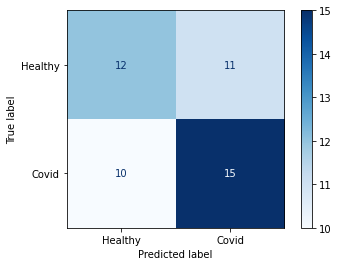

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
probabilities = global_model.predict(clients_test[1])
y_pred_new= []
y_true=[]
for i in range (clients_test[1][0][1].shape[0]):
  if clients_test[1][0][1][i][0]==1:
    y_true.append(0)
  elif clients_test[1][0][1][i][1]==1:
    y_true.append(1)
for i in range (clients_test[1][1][1].shape[0]):
  if clients_test[1][1][1][i][0]==1:
    y_true.append(0)
  elif clients_test[1][1][1][i][1]==1:
    y_true.append(1)
for i in range (probabilities.shape[0]):
  if probabilities[i][0]>=probabilities[i][1]:
    y_pred_new.append(0)
  elif probabilities[i][0]<probabilities[i][1]:
    y_pred_new.append(1)
cm = confusion_matrix(y_true, y_pred_new)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Healthy", "Covid"])

disp.plot(cmap=plt.cm.Blues)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """


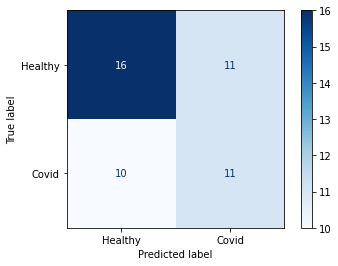

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
probabilities = global_model.predict_generator(clients_test[2])
y_pred_new= []
y_true = clients_test[2].classes
y_pred_new=[]
for i in range (probabilities.shape[0]):
  if probabilities[i][0]>probabilities[i][1]:
    y_pred_new.append(0)
  else:
    y_pred_new.append(1)
cm = confusion_matrix(y_true, y_pred_new)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Healthy", "Covid"])

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
global_model.evaluate(clients_test[3])

1/1 [==============================] - 2s 2s/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - f1: 1.0000


[0.0, 1.0, 1.0, 1.0, 1.0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """


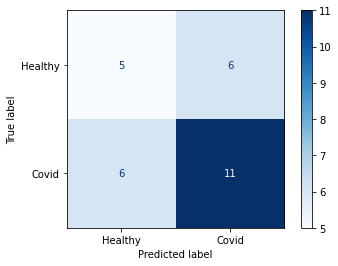

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
probabilities = global_model.predict_generator(clients_test[3])
y_pred_new= []
y_true = clients_test[3].classes
y_pred_new=[]
for i in range (probabilities.shape[0]):
  if probabilities[i][0]>probabilities[i][1]:
    y_pred_new.append(0)
  else:
    y_pred_new.append(1)
cm = confusion_matrix(y_true, y_pred_new)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Healthy", "Covid"])

disp.plot(cmap=plt.cm.Blues)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """


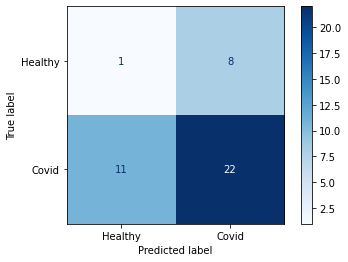

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
probabilities = global_model.predict_generator(clients_test[4])
y_pred_new= []
y_true = clients_test[4].classes
y_pred_new=[]
for i in range (probabilities.shape[0]):
  if probabilities[i][0]>probabilities[i][1]:
    y_pred_new.append(0)
  else:
    y_pred_new.append(1)
cm = confusion_matrix(y_true, y_pred_new)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Healthy", "Covid"])

disp.plot(cmap=plt.cm.Blues)
plt.show()